# GOAL :
Predict the final first-innings total score using overs, runs, wickets, etc.


# DATA LOADING

In [3]:
import numpy as np
import pandas as pd

In [4]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches.tail(4)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [11]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [12]:
print(matches.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [13]:
print(matches['team1'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


# Exploratory Data Analysis (EDA)

In [14]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [15]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [16]:
teams_1 = set(matches['team1'].unique())
teams_2 = set(matches['team2'].unique())
toss_winners = set(matches['toss_winner'].unique())
winners = set(matches['winner'].dropna().unique())

all_teams = sorted(set.union(teams_1, teams_2, toss_winners, winners))
print(all_teams)

['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']


In [17]:
team_name_corrections = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab' : 'Punjab Kings',
    'Royal Challengers Bangalore' :'Royal Challengers Bengaluru'
    # You can map Kochi Tuskers Kerala to 'Unknown' or drop if needed
}

In [18]:
columns_to_fix = ['team1', 'team2', 'toss_winner', 'winner']

for col in columns_to_fix:
    matches[col] = matches[col].replace(team_name_corrections)

In [19]:
print(matches['team1'].unique())

['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Rising Pune Supergiant' 'Lucknow Super Giants' 'Gujarat Titans']


In [20]:
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_corrections)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_corrections)

In [21]:
rare_teams = ['Kochi Tuskers Kerala', 'Rising Pune Supergiants',
 'Rising Pune Supergiant','Pune Warriors', 'Gujarat Lions']
matches = matches[~matches['team1'].isin(rare_teams)]
matches = matches[~matches['team2'].isin(rare_teams)]
deliveries=deliveries[~deliveries['batting_team'].isin(rare_teams)]
deliveries=deliveries[~deliveries['bowling_team'].isin(rare_teams)]

In [22]:
print(matches['team1'].unique())

['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Lucknow Super Giants'
 'Gujarat Titans']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ajeet\AppData\Local\Temp\ipykernel_16664\3356815549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=matches, palette='Set3')


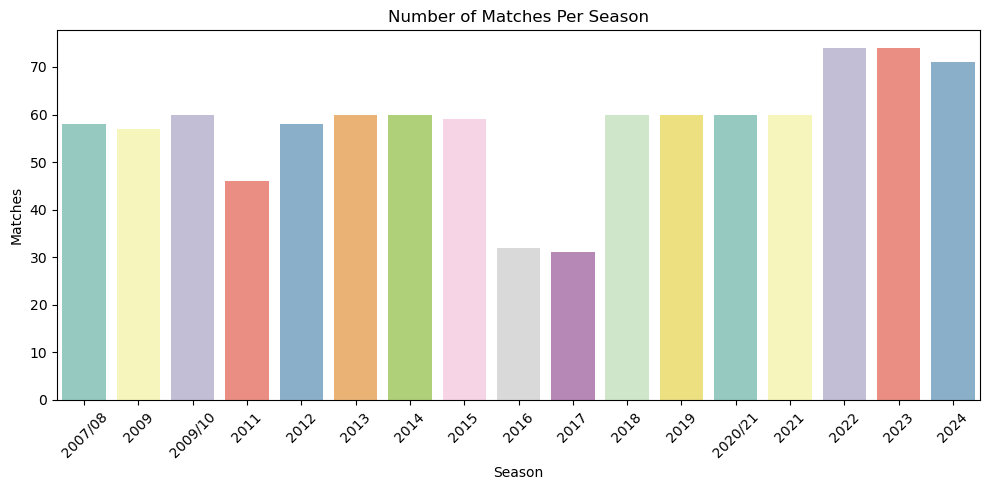

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='season', data=matches, palette='Set3')
plt.title("Number of Matches Per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

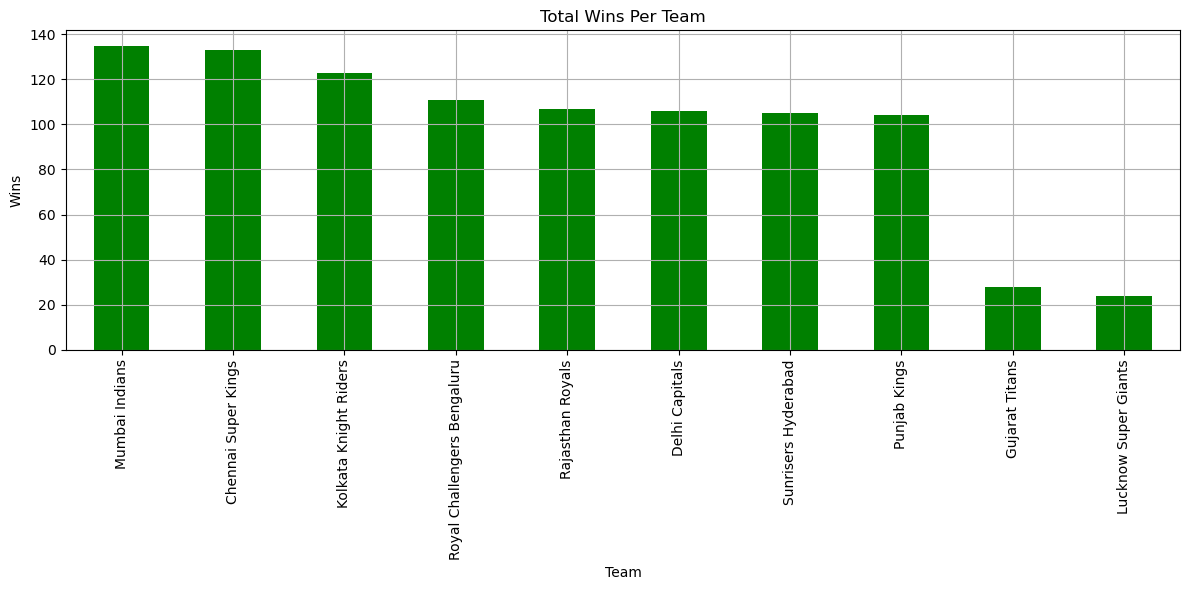

In [25]:
plt.figure(figsize=(12, 6))
matches['winner'].value_counts().plot(kind='bar', color='green')
plt.title("Total Wins Per Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

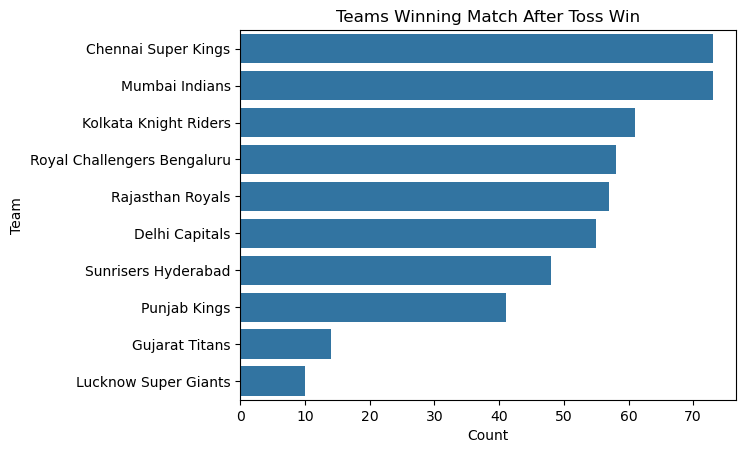

In [26]:
win_toss = matches[matches['toss_winner'] == matches['winner']]
sns.countplot(y=win_toss['winner'], order=win_toss['winner'].value_counts().index)
plt.title("Teams Winning Match After Toss Win")
plt.xlabel("Count")
plt.ylabel("Team")
plt.show()

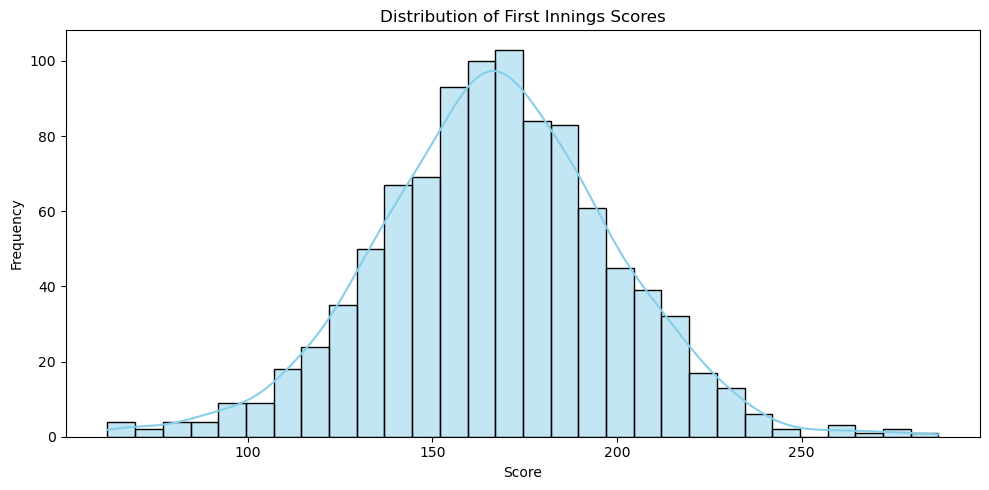

In [27]:
first_innings = deliveries[deliveries['inning'] == 1]
scores = first_innings.groupby('match_id')['total_runs'].sum()

plt.figure(figsize=(10, 5))
sns.histplot(scores, bins=30, kde=True, color='skyblue')
plt.title("Distribution of First Innings Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

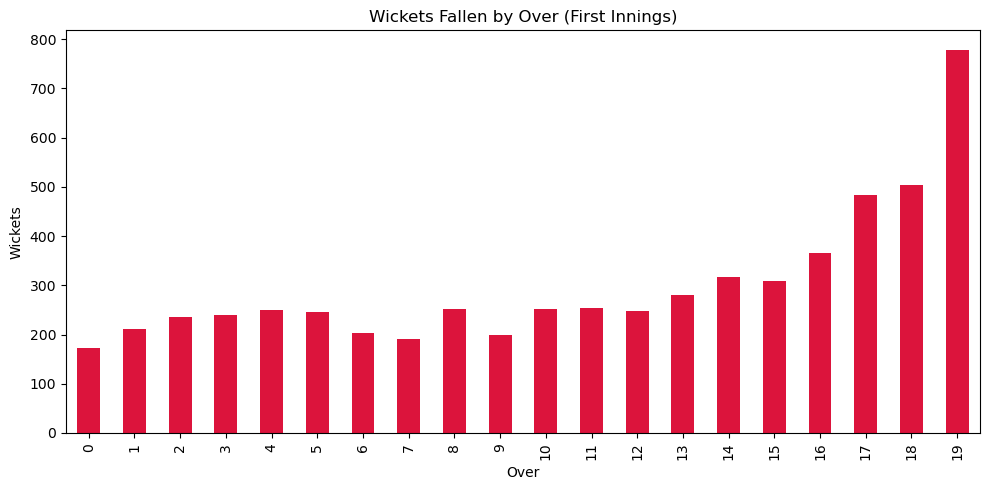

In [28]:
wickets = first_innings[first_innings['player_dismissed'].notnull()]
wickets_by_over = wickets.groupby('over').count()['player_dismissed']

plt.figure(figsize=(10, 5))
wickets_by_over.plot(kind='bar', color='crimson')
plt.title("Wickets Fallen by Over (First Innings)")
plt.xlabel("Over")
plt.ylabel("Wickets")
plt.tight_layout()
plt.show()

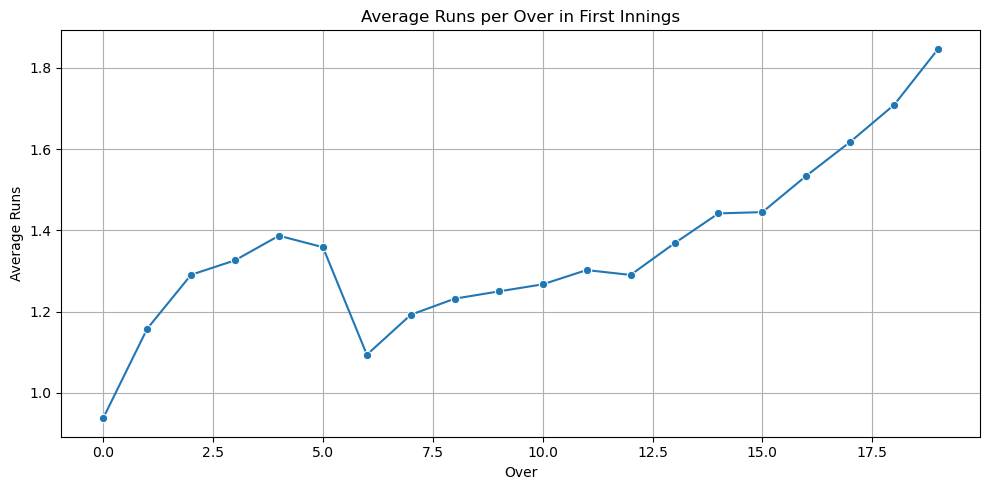

In [29]:
run_rate_df = first_innings.groupby('over')['total_runs'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=run_rate_df, x='over', y='total_runs', marker='o')
plt.title("Average Runs per Over in First Innings")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ajeet\AppData\Local\Temp\ipykernel_16664\3423003947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='venue', data=matches, order=matches['venue'].value_counts().index[:10], palette='cool')


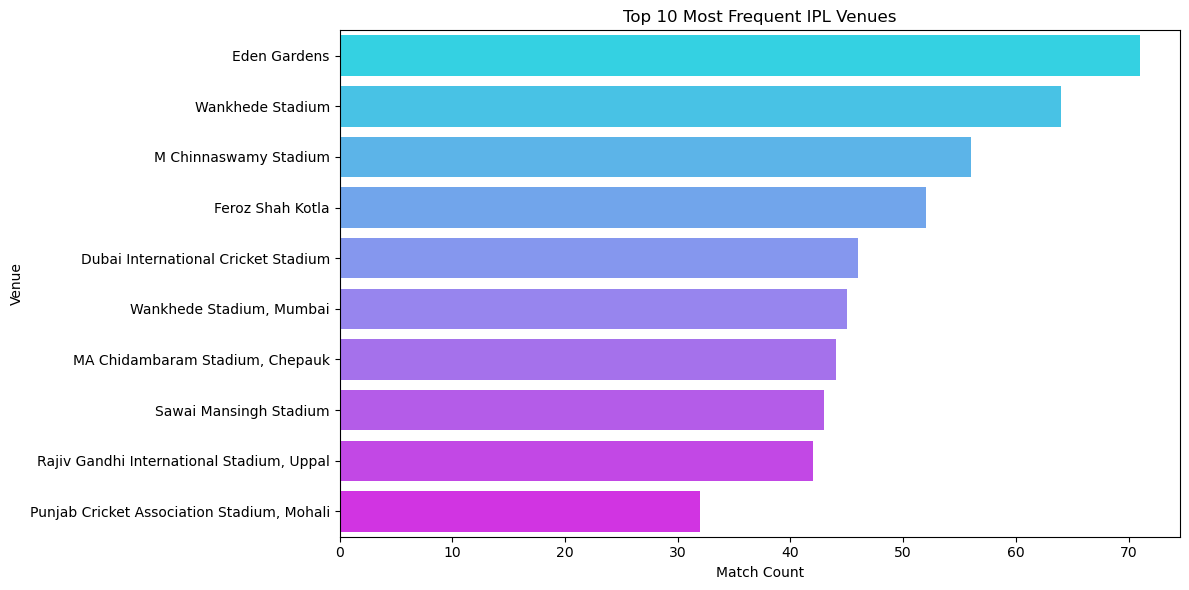

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(y='venue', data=matches, order=matches['venue'].value_counts().index[:10], palette='cool')
plt.title("Top 10 Most Frequent IPL Venues")
plt.xlabel("Match Count")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()

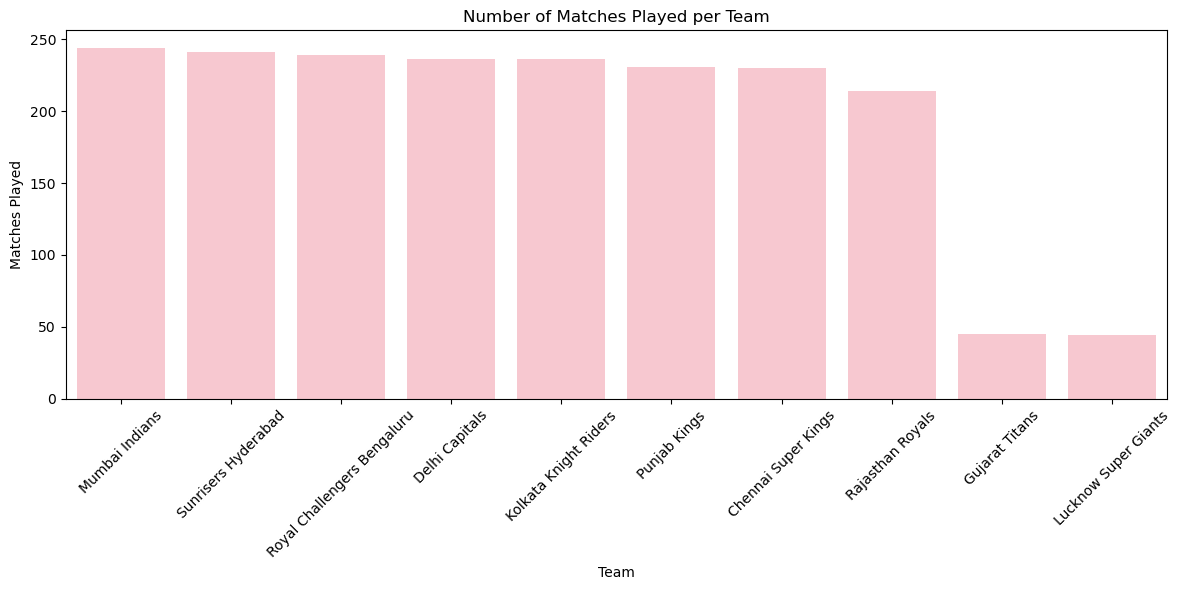

In [32]:
team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()

# Combine counts
total_counts = team1_counts.add(team2_counts, fill_value=0).sort_values(ascending=False)

# Convert to DataFrame for plotting
team_matches_df = total_counts.reset_index()
team_matches_df.columns = ['Team', 'Matches Played']

# Plot using seaborn barplot
plt.figure(figsize=(12,6))
sns.barplot(x='Team', y='Matches Played', data=team_matches_df,color='pink')
plt.title('Number of Matches Played per Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [33]:
## Feature selection 
## batting_team 
## bowling_team
## toss_winner
## venue 
## balls remaining 
## current_runs 
## wickets_fallen 
## current_run_rate 
##last_5_overs_runs

first_innings = deliveries[deliveries['inning'] == 1].copy()

In [34]:
first_innings['wicket_fallen'] = first_innings['player_dismissed'].notnull().astype(int)

In [35]:
over_summary = first_innings.groupby(['match_id', 'batting_team', 'bowling_team', 'over']).agg(
    runs_in_over=('total_runs', 'sum'),
    wickets_in_over=('wicket_fallen', 'sum')
).reset_index()

In [36]:
over_summary = over_summary.sort_values(['match_id', 'over'])
over_summary['current_runs'] = over_summary.groupby('match_id')['runs_in_over'].cumsum()
over_summary['wickets_fallen'] = over_summary.groupby('match_id')['wickets_in_over'].cumsum()

In [37]:
over_summary['balls_remaining'] = 120 - (over_summary['over'] + 1) * 6

In [38]:
over_summary['current_run_rate'] = over_summary['current_runs'] / ((over_summary['over'] + 1) * 6) * 6

In [39]:
over_summary['last_5_overs_runs'] = (
    over_summary
    .groupby('match_id')['runs_in_over']
    .rolling(window=5, min_periods=1)
    .sum()
    .reset_index(drop=True)
)

In [40]:
over_summary = over_summary[[
    'match_id', 'batting_team', 'bowling_team', 'over',
    'balls_remaining', 'current_runs', 'wickets_fallen',
    'current_run_rate', 'last_5_overs_runs'
]]


In [41]:
final_score = first_innings.groupby('match_id')['total_runs'].sum().reset_index()
final_score.columns = ['match_id', 'final_score']

In [42]:
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [43]:
match_features = matches[['match_id', 'toss_winner', 'city']]

In [44]:
df = pd.merge(over_summary, final_score, on='match_id')
df = pd.merge(df, match_features, on='match_id', how='left')

In [45]:
df.head()

,match_id,batting_team,bowling_team,over,balls_remaining,current_runs,wickets_fallen,current_run_rate,last_5_overs_runs,final_score,toss_winner,city
0,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,0,114,3,0,3.0,3.0,222,Royal Challengers Bengaluru,Bangalore
1,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,1,108,21,0,10.5,21.0,222,Royal Challengers Bengaluru,Bangalore
2,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,2,102,27,0,9.0,27.0,222,Royal Challengers Bengaluru,Bangalore
3,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,3,96,50,0,12.5,50.0,222,Royal Challengers Bengaluru,Bangalore
4,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,4,90,60,0,12.0,60.0,222,Royal Challengers Bengaluru,Bangalore


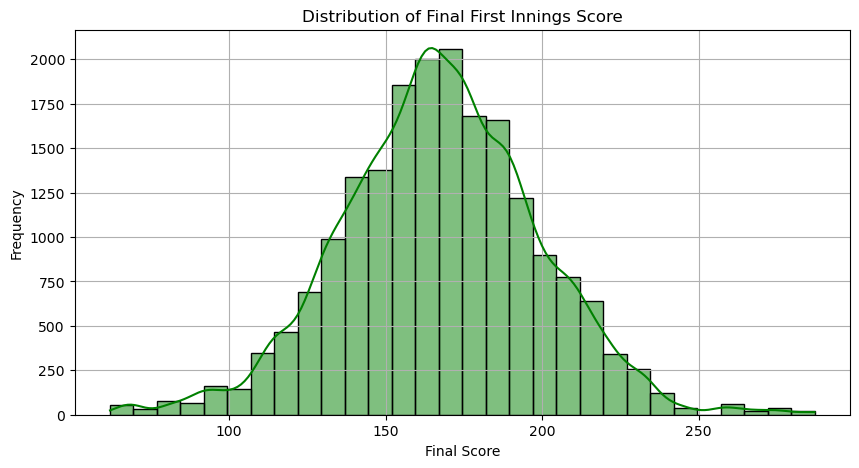

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['final_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Final First Innings Score')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

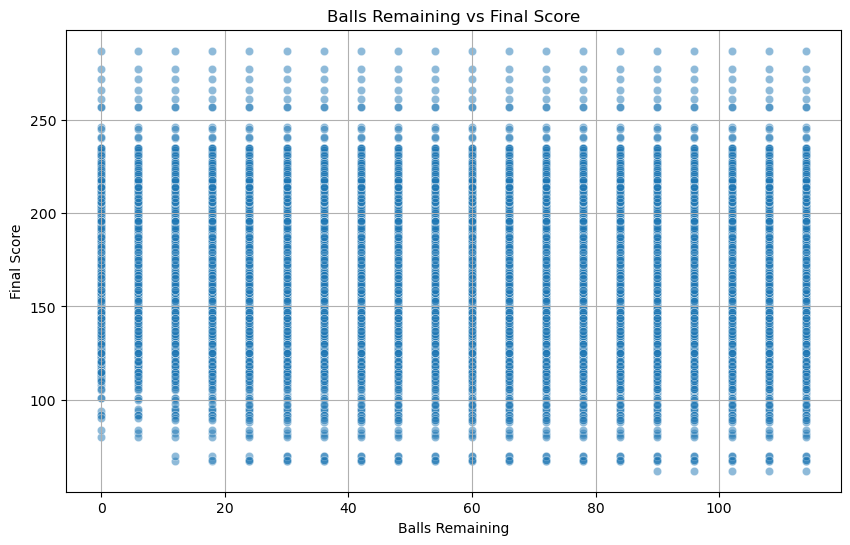

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='balls_remaining', y='final_score', data=df, alpha=0.5)
plt.title('Balls Remaining vs Final Score')
plt.xlabel('Balls Remaining')
plt.ylabel('Final Score')
plt.grid()
plt.show()

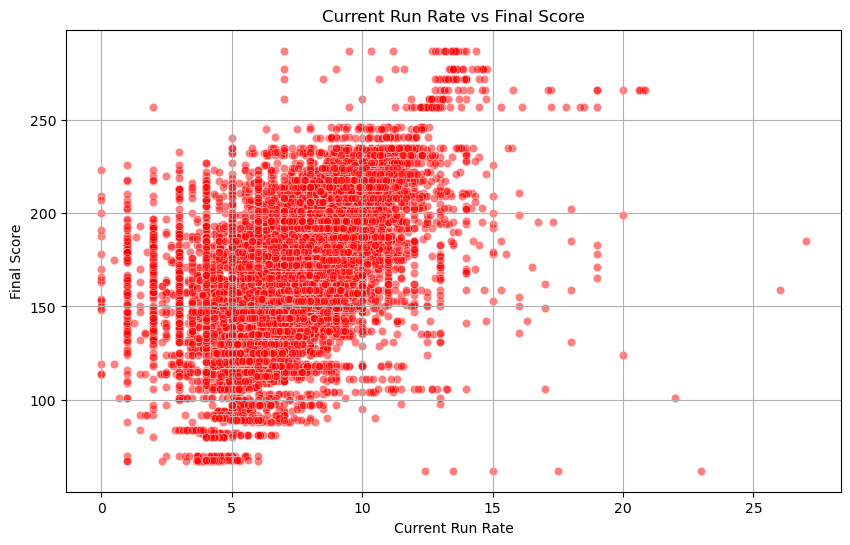

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='current_run_rate', y='final_score', data=df, alpha=0.5, color='red')
plt.title('Current Run Rate vs Final Score')
plt.xlabel('Current Run Rate')
plt.ylabel('Final Score')
plt.grid()
plt.show()

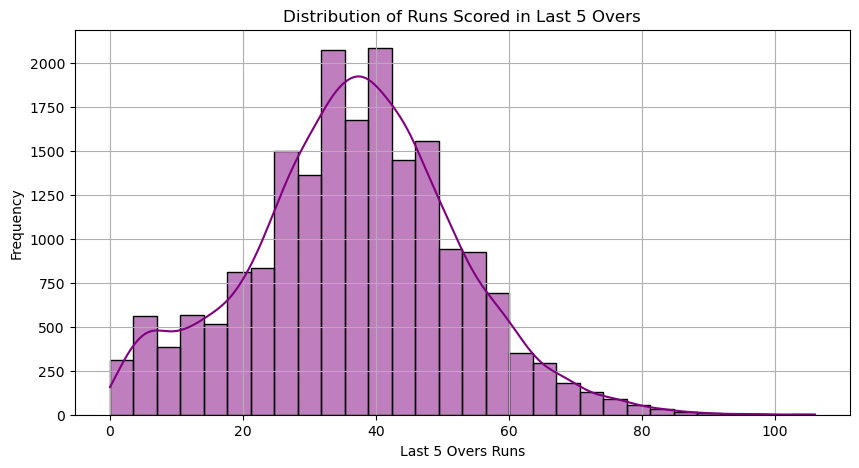

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df['last_5_overs_runs'], bins=30, kde=True, color='purple')
plt.title('Distribution of Runs Scored in Last 5 Overs')
plt.xlabel('Last 5 Overs Runs')
plt.ylabel('Frequency')
plt.grid()
plt.show()

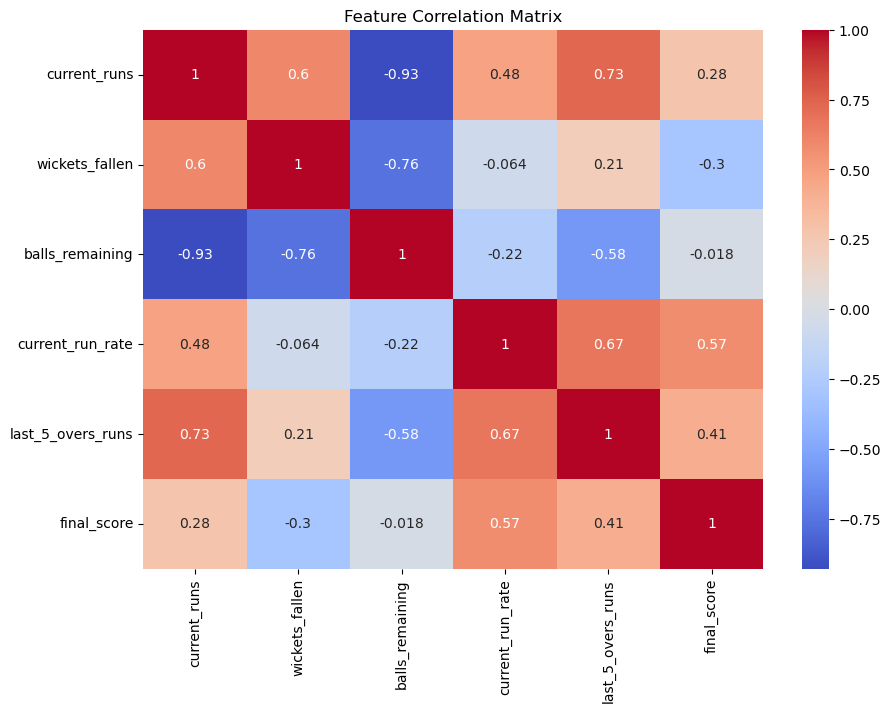

In [51]:
plt.figure(figsize=(10,7))
corr = df[['current_runs', 'wickets_fallen', 'balls_remaining', 'current_run_rate', 'last_5_overs_runs', 'final_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# MODEL TRAINING

In [52]:
df.head()

,match_id,batting_team,bowling_team,over,balls_remaining,current_runs,wickets_fallen,current_run_rate,last_5_overs_runs,final_score,toss_winner,city
0,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,0,114,3,0,3.0,3.0,222,Royal Challengers Bengaluru,Bangalore
1,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,1,108,21,0,10.5,21.0,222,Royal Challengers Bengaluru,Bangalore
2,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,2,102,27,0,9.0,27.0,222,Royal Challengers Bengaluru,Bangalore
3,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,3,96,50,0,12.5,50.0,222,Royal Challengers Bengaluru,Bangalore
4,335982,Kolkata Knight Riders,Royal Challengers Bengaluru,4,90,60,0,12.0,60.0,222,Royal Challengers Bengaluru,Bangalore


In [53]:
df1=df

In [54]:
df1= df1.drop(columns=['match_id'])

In [55]:
df1.shape

(19435, 11)

In [56]:
df1.isnull().sum()

batting_team            0
bowling_team            0
over                    0
balls_remaining         0
current_runs            0
wickets_fallen          0
current_run_rate        0
last_5_overs_runs       0
final_score             0
toss_winner             0
city                 1020
dtype: int64

In [57]:
df1.head()

,batting_team,bowling_team,over,balls_remaining,current_runs,wickets_fallen,current_run_rate,last_5_overs_runs,final_score,toss_winner,city
0,Kolkata Knight Riders,Royal Challengers Bengaluru,0,114,3,0,3.0,3.0,222,Royal Challengers Bengaluru,Bangalore
1,Kolkata Knight Riders,Royal Challengers Bengaluru,1,108,21,0,10.5,21.0,222,Royal Challengers Bengaluru,Bangalore
2,Kolkata Knight Riders,Royal Challengers Bengaluru,2,102,27,0,9.0,27.0,222,Royal Challengers Bengaluru,Bangalore
3,Kolkata Knight Riders,Royal Challengers Bengaluru,3,96,50,0,12.5,50.0,222,Royal Challengers Bengaluru,Bangalore
4,Kolkata Knight Riders,Royal Challengers Bengaluru,4,90,60,0,12.0,60.0,222,Royal Challengers Bengaluru,Bangalore


In [58]:
df1['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Sharjah', 'Dubai', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [59]:
most_common_city = df1['city'].mode()[0]
df1['city'] = df1['city'].fillna(most_common_city)

In [60]:
df1['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Bengaluru', 'Indore', 'Sharjah', 'Dubai', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [61]:
df1.isnull().sum()

batting_team         0
bowling_team         0
over                 0
balls_remaining      0
current_runs         0
wickets_fallen       0
current_run_rate     0
last_5_overs_runs    0
final_score          0
toss_winner          0
city                 0
dtype: int64

In [62]:
new_teams = ['Lucknow Super Giants', 'Gujarat Titans']
df1=df1[~df1['batting_team'].isin(new_teams)]
df1=df1[~df1['bowling_team'].isin(new_teams)]

In [63]:
X = df1.drop(columns=['final_score'])  # Features
y = df1['final_score'] 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [65]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,handle_unknown='ignore', drop='first'),['batting_team','bowling_team','toss_winner','city'])
]
,remainder='passthrough')

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [67]:
pipe = Pipeline([
    ('preprocessing', trf),
    ('scaling', StandardScaler()),
    ('model',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [68]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7630256414413452
9.935954772674286


In [69]:

df1['batting_team'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Royal Challengers Bengaluru', 'Delhi Capitals'], dtype=object)

In [73]:
import cloudpickle

with open('pipe.pkl', 'wb') as f:
    cloudpickle.dump(pipe, f)